In [13]:
import tweepy
import json
from twitter__api import (api_key, api_secret, access_token, access_token_secret)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [20]:
# Target Account

target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # print(json.dumps(tweet, indent = 4 , sort_keys = True))
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"],
                           'Text': tweet['text'], 
                           'Source': tweet['source'],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1


In [21]:
len(sentiments)

100

In [37]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.4588,Mon Nov 27 18:02:03 +0000 2017,0.800,0.000,0.200,"<a href=""http://www.radian6.com"" rel=""nofollow...",Harry and Meghan: A Royal Engagement. Tonight ...,1
1,0.5106,Mon Nov 27 17:33:04 +0000 2017,0.679,0.098,0.223,"<a href=""http://www.radian6.com"" rel=""nofollow...",Would you know what to do in a medical emergen...,2
2,0.3612,Mon Nov 27 17:00:03 +0000 2017,0.884,0.000,0.116,"<a href=""https://studio.twitter.com"" rel=""nofo...",What happens when driverless cars have to make...,3
3,0.2023,Mon Nov 27 16:02:05 +0000 2017,0.893,0.000,0.107,"<a href=""http://www.radian6.com"" rel=""nofollow...",💫 The #SoundOf2018 longlist has been announced...,4
4,0.0000,Mon Nov 27 15:23:03 +0000 2017,1.000,0.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",'When did I know she was the one? Very first t...,5


In [38]:
sentiments_pd.to_csv('SentimentAnalysisBBC.csv')

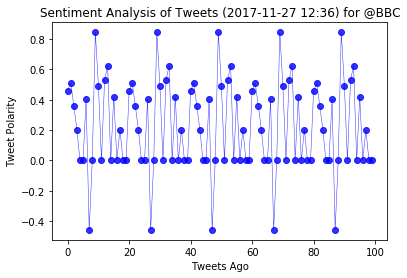

In [31]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, color = 'b')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiment Analysis of Tweets for @BBC")
plt.show()